Programmer: Jacob Maurer
Date: 9/17/2024
Description: This file is meant to explore different network layers and how they differ/are the same when given an input

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
rr_post_weight_1 = pd.read_csv("results/relu_relu_small_regress_weight_post_1.csv").to_numpy()
rr_post_bias_1 = pd.read_csv("results/relu_relu_small_regress_bias_post_2.csv").to_numpy()
ss_post_weight_1 = pd.read_csv("results/ss_weight_post_1.csv").to_numpy()
ss_post_bias_1 = pd.read_csv("results/ss_bias_post_2.csv").to_numpy()
ee_post_weight_1 = pd.read_csv("results/elu_elu_small_regress_weight_post_1.csv").to_numpy()
ee_post_weight_2 = pd.read_csv("results/elu_elu_small_regress_weight_post_3.csv").to_numpy()
ee_post_weight_3 = pd.read_csv("results/elu_elu_small_regress_weight_post_5.csv").to_numpy()
sisi_post_weight_1 = pd.read_csv("results/silu_silu_small_regress_weight_post_1.csv").to_numpy()
sisi_post_weight_2 = pd.read_csv("results/silu_silu_small_regress_weight_post_3.csv").to_numpy()
sisi_post_weight_3 = pd.read_csv("results/silu_silu_small_regress_weight_post_5.csv").to_numpy()
mul_sisi_post_weight_1 = pd.read_csv("results/mul10_silu_silu_small_regress_weight_post_1.csv").to_numpy()
mul_sisi_post_weight_2 = pd.read_csv("results/mul10_silu_silu_small_regress_weight_post_3.csv").to_numpy()
mul_sisi_post_weight_3 = pd.read_csv("results/mul10_silu_silu_small_regress_weight_post_5.csv").to_numpy()
mul_rere_post_weight_1 = pd.read_csv("results/mul10_relu_relu_small_regress_weight_post_1.csv").to_numpy()
mul_rere_post_weight_2 = pd.read_csv("results/mul10_relu_relu_small_regress_weight_post_3.csv").to_numpy()
mul_rere_post_weight_3 = pd.read_csv("results/mul10_relu_relu_small_regress_weight_post_5.csv").to_numpy()
rr_post_weight_2 = pd.read_csv("results/relu_relu_small_regress_weight_post_3.csv").to_numpy()
rr_post_bias_2 = pd.read_csv("results/relu_relu_small_regress_bias_post_4.csv").to_numpy()
ss_post_weight_2 = pd.read_csv("results/ss_weight_post_3.csv").to_numpy()
ss_post_bias_2 = pd.read_csv("results/ss_bias_post_4.csv").to_numpy()
rr_post_weight_3 = pd.read_csv("results/relu_relu_small_regress_weight_post_5.csv").to_numpy()
rr_post_bias_3 = pd.read_csv("results/relu_relu_small_regress_bias_post_6.csv").to_numpy()
ss_post_weight_3 = pd.read_csv("results/ss_weight_post_5.csv").to_numpy()
ss_post_bias_3 = pd.read_csv("results/ss_bias_post_6.csv").to_numpy()

In [3]:
rr_pre_weight_1 = pd.read_csv("results/relu_relu_small_regress_weight_pre_1.csv").to_numpy()
rr_pre_bias_1 = pd.read_csv("results/relu_relu_small_regress_bias_pre_2.csv").to_numpy()
ss_pre_weight_1 = pd.read_csv("results/ss_weight_pre_1.csv").to_numpy()
ss_pre_bias_1 = pd.read_csv("results/ss_bias_pre_2.csv").to_numpy()
ee_pre_weight_1 = pd.read_csv("results/elu_elu_small_regress_weight_pre_1.csv").to_numpy()
ee_pre_weight_2 = pd.read_csv("results/elu_elu_small_regress_weight_pre_3.csv").to_numpy()
ee_pre_weight_3 = pd.read_csv("results/elu_elu_small_regress_weight_pre_5.csv").to_numpy()
sisi_pre_weight_1 = pd.read_csv("results/silu_silu_small_regress_weight_pre_1.csv").to_numpy()
sisi_pre_weight_2 = pd.read_csv("results/silu_silu_small_regress_weight_pre_3.csv").to_numpy()
sisi_pre_weight_3 = pd.read_csv("results/silu_silu_small_regress_weight_pre_5.csv").to_numpy()
mul_sisi_pre_weight_1 = pd.read_csv("results/mul10_silu_silu_small_regress_weight_pre_1.csv").to_numpy()
mul_sisi_pre_weight_2 = pd.read_csv("results/mul10_silu_silu_small_regress_weight_pre_3.csv").to_numpy()
mul_sisi_pre_weight_3 = pd.read_csv("results/mul10_silu_silu_small_regress_weight_pre_5.csv").to_numpy()
mul_rere_pre_weight_1 = pd.read_csv("results/mul10_relu_relu_small_regress_weight_pre_1.csv").to_numpy()
mul_rere_pre_weight_2 = pd.read_csv("results/mul10_relu_relu_small_regress_weight_pre_3.csv").to_numpy()
mul_rere_pre_weight_3 = pd.read_csv("results/mul10_relu_relu_small_regress_weight_pre_5.csv").to_numpy()
rr_pre_weight_2 = pd.read_csv("results/relu_relu_small_regress_weight_pre_3.csv").to_numpy()
rr_pre_bias_2 = pd.read_csv("results/relu_relu_small_regress_bias_pre_4.csv").to_numpy()
ss_pre_weight_2 = pd.read_csv("results/ss_weight_pre_3.csv").to_numpy()
ss_pre_bias_2 = pd.read_csv("results/ss_bias_pre_4.csv").to_numpy()
rr_pre_weight_3 = pd.read_csv("results/relu_relu_small_regress_weight_pre_5.csv").to_numpy()
rr_pre_bias_3 = pd.read_csv("results/relu_relu_small_regress_bias_pre_6.csv").to_numpy()
ss_pre_weight_3 = pd.read_csv("results/ss_weight_pre_5.csv").to_numpy()
ss_pre_bias_3 = pd.read_csv("results/ss_bias_pre_6.csv").to_numpy()

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [16]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
flatten = nn.Flatten()
sample_x = None
for X, y in test_dataloader:
    sample_x = flatten(X[10]).numpy()[0]
    print(sample_x)
    print(y[10].numpy())
    break

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.5686275
 0.74509805 0.38039216 0.42745098 0.4117647  0.73333335 0.29803923
 0.         0.         0.         0.00784314 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.2509804  0.6666667  0.6392157  0.8156863  0.9529412
 0.9411765  0.8980392  0.6784314  0.63529414 0.6039216  0.07058824
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.15294118 0.61960787 0.76862746
 0.58431375 0.7490196  0.78039217 0.8745098  0.9529412  0.7294118
 0.7490196  0.6666667  0.60784316 0.63529414 0.49411765 0.08627451
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01176471 0.
 0.4117647  0.6313726  0.5882353  0.5529412  0.50980395 0.7803

In [5]:
import numpy as np

In [19]:
relu = rr_weight_1.dot(sample_x) + rr_bias_1
relu = nn.functional.relu(torch.from_numpy(relu))
sigmoid = ss_weight_1.dot(sample_x) + ss_bias_1
sigmoid = nn.functional.sigmoid(torch.from_numpy(sigmoid))
relu = rr_weight_2.dot(relu.numpy()) + rr_bias_2
relu = nn.functional.relu(torch.from_numpy(relu))
sigmoid = ss_weight_2.dot(sigmoid.numpy()) + ss_bias_2
sigmoid = nn.functional.sigmoid(torch.from_numpy(sigmoid))
relu = rr_weight_3.dot(relu.numpy()) + rr_bias_3
sigmoid = ss_weight_3.dot(sigmoid.numpy()) + ss_bias_3

print(np.mean((relu-sigmoid)))
print(np.std((relu-sigmoid)))


-0.13119910446577038
1.837005429226821


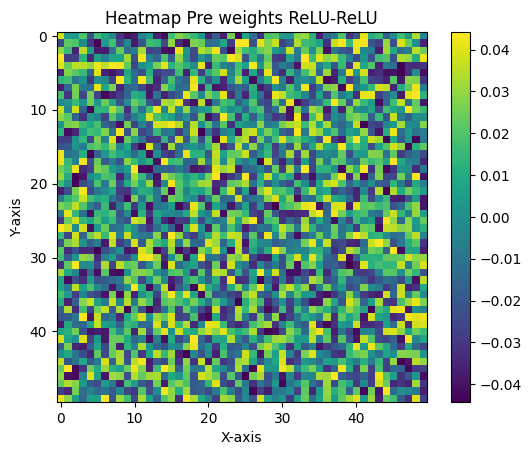

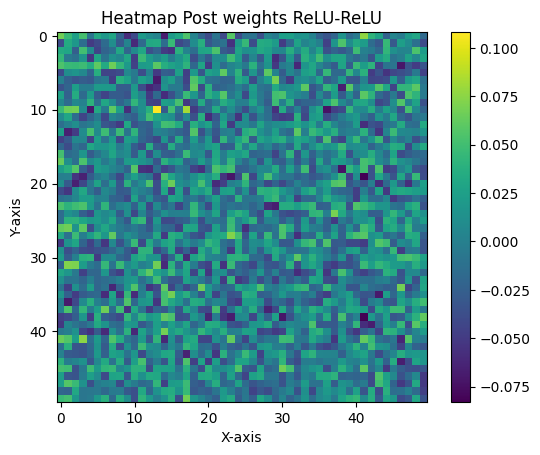

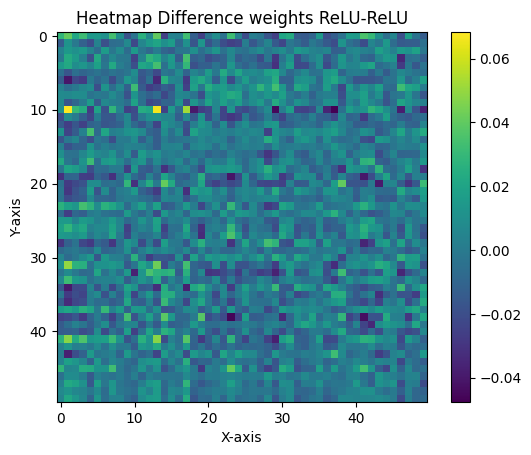

In [13]:
window = 50
neuron_start = 40
column_start = 40

pre_layer = ss_pre_weight_2[neuron_start:neuron_start+window]
post_layer = ss_post_weight_2[neuron_start:neuron_start+window]

# Create the heatmap

fig = plt.figure(0)
plt.imshow([temp[column_start:column_start+window] for temp in pre_layer], cmap='viridis', interpolation='nearest')

# Add a colorbar for reference
plt.colorbar()

# Add labels (optional)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap Pre weights ReLU-ReLU')

fig = plt.figure(1)
plt.imshow([temp[column_start:column_start+window] for temp in post_layer], cmap='viridis', interpolation='nearest')

# Add a colorbar for reference
plt.colorbar()

# Add labels (optional)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap Post weights ReLU-ReLU')

fig = plt.figure(2)
plt.imshow([temp[column_start:column_start+window] for temp in post_layer-pre_layer], cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap Difference weights ReLU-ReLU')

# Show the plot
plt.show()
